In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [51]:
world_happiness=pd.read_csv('world_happiness.csv')

In [52]:
world_happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [53]:
world_happiness.columns #checking the columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [54]:
world_happiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We can see there is no null value in the dataset

In [55]:
world_happiness['Country'].value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

As Country,Region,Happiness Rank has no impact on happiness score we are dropping these columns

In [56]:
world_happiness.drop(['Country','Region','Happiness Rank'],axis=1,inplace=True)

In [57]:
world_happiness

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# EDA (Exploratory Data Analysis)

In [58]:
world_happiness.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Statistic data showa there are skewness in data

In [59]:
world_happiness.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

skewness threshold taken +/- 0.75

In [60]:
world_happiness.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

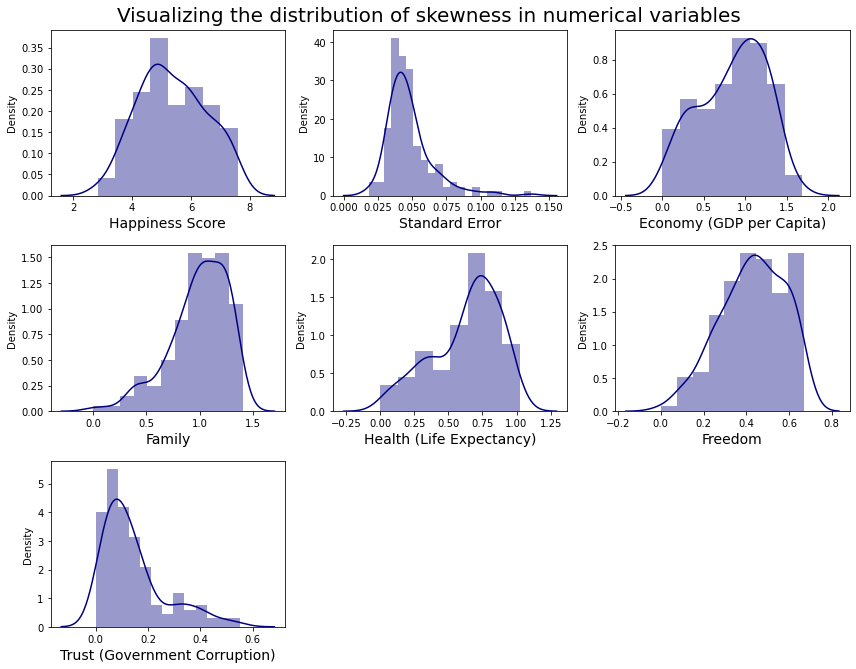

In [61]:
# Checking how the data has been distriubted in each column

col = ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for i in col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(world_happiness[i], color="navy")
        plt.xlabel(i,fontsize=14)
    plotnumber+=1
plt.tight_layout()

In [62]:
world_happiness.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

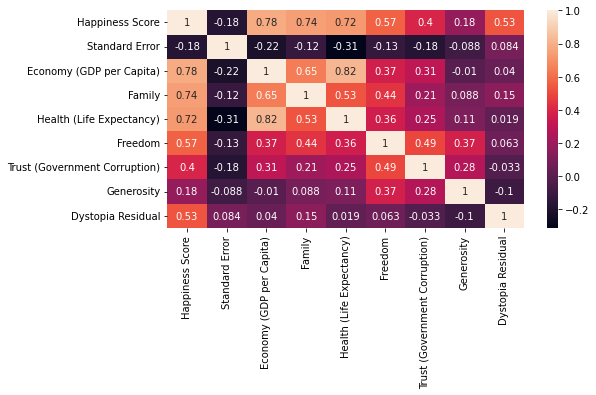

In [63]:
corr=world_happiness.corr()

fig = plt.figure(figsize =(8, 4))
sns.heatmap(corr,annot=True)

In [93]:
world_happiness.corr()['Happiness Score']

Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

As Standard Error is negatively correlated with Happiness Score and the skewness is high, we are removing Standard Error from the dataset

In [94]:
world_happiness.drop(['Standard Error'],axis=1,inplace=True)

In [96]:
world_happiness.shape

(158, 8)

# Outliers

In [97]:
import warnings
warnings.filterwarnings('ignore')

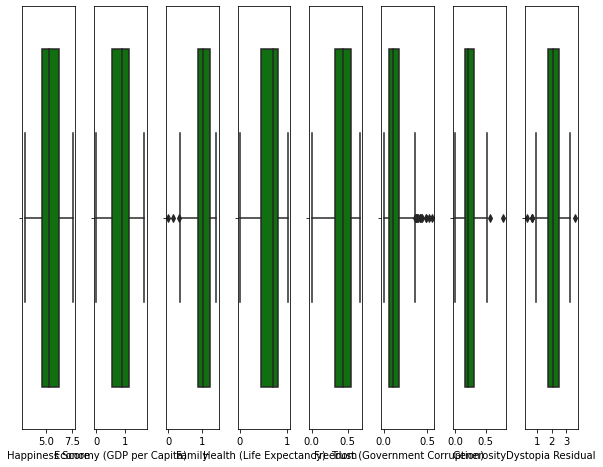

In [98]:
collist=world_happiness.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(world_happiness[collist[i]],color='green',orient='h')
    plt.tight_layout()#fits all graphs in one single format

We can see there are outliers present in the dataset

Z Score

In [99]:
from scipy.stats import zscore

In [100]:
z=np.abs(zscore(world_happiness))
z

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
153,1.674055,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.783571,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,2.076199,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,2.164688,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [101]:
#threshold=3
print(np.where(z>3)) #returns index of outliers

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([5, 6, 2, 5, 7, 2], dtype=int64))


In [103]:
z.iloc[27]

Happiness Score                  1.082256
Economy (GDP per Capita)         2.101026
Family                           0.322476
Health (Life Expectancy)         0.678336
Freedom                          1.409878
Trust (Government Corruption)    3.164619
Generosity                       0.700286
Dystopia Residual                0.982677
Name: 27, dtype: float64

In [104]:
#to drop outliers 
world_happiness_new=world_happiness[(z<3).all(axis=1)]
print("old dataFrame",world_happiness.shape)
print("new dataFrame",world_happiness_new.shape)
print("total dropped rows",world_happiness.shape[0]-world_happiness_new.shape[0])

old dataFrame (158, 8)
new dataFrame (152, 8)
total dropped rows 6


percentage data loss

In [105]:
loss_percent=(158-152)/158*100
print(loss_percent,'%')

3.79746835443038 %


In [106]:
#independent col
x=world_happiness_new.drop('Happiness Score',axis=1)
#target
y=world_happiness_new['Happiness Score']

In [107]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [108]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [109]:
x

array([[ 1.49611068,  1.66761865,  1.48143363, ...,  1.8220699 ,
         0.65595135,  0.74453432],
       [ 1.19771756,  2.02101058,  1.52291872, ...,  0.35523024,
         1.57166845,  1.10426166],
       [ 1.27024568,  1.7401529 ,  1.06659878, ...,  1.95457489,
         0.97742359,  0.69531125],
       ...,
       [-1.35114936, -2.09149024, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.4183337 , -2.01503265, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827051, -1.91154624, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

In [110]:
pd.DataFrame(x).skew()

0   -0.144167
1   -0.149268
2   -0.184207
3   -0.077878
4    0.179115
5    0.022444
6    0.014422
dtype: float64

In [111]:
from sklearn.preprocessing import StandardScaler # transforms data such that mean =0 and std dev=1
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.49611068,  1.66761865,  1.48143363, ...,  1.8220699 ,
         0.65595135,  0.74453432],
       [ 1.19771756,  2.02101058,  1.52291872, ...,  0.35523024,
         1.57166845,  1.10426166],
       [ 1.27024568,  1.7401529 ,  1.06659878, ...,  1.95457489,
         0.97742359,  0.69531125],
       ...,
       [-1.35114936, -2.09149024, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.4183337 , -2.01503265, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827051, -1.91154624, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [113]:
x_train.shape

(121, 7)

In [114]:
y_train.shape

(121,)

In [119]:
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('predicted value:',predlr)
print('actual value:',y_test)
print('R2 Score:',r2_score(predlr,y_test))

predicted value: [5.43579183 3.71938085 4.88755145 5.09300898 4.04667695 3.87371478
 6.6501135  7.32798702 7.04831159 6.95146595 4.08041625 4.53276372
 4.6856853  6.85209155 5.40567367 7.30754934 5.72149929 6.47549444
 4.45459917 4.64981391 4.60452002 6.46238465 5.7449923  5.49017126
 5.70214502 3.9702986  6.33432521 5.15646611 4.60257828 5.97507716
 5.05889145]
actual value: 69     5.548
150    3.655
97     4.885
83     5.140
137    3.995
141    3.904
26     6.670
12     7.200
18     6.937
15     6.983
136    4.033
130    4.292
109    4.686
19     6.901
70     5.477
9      7.284
66     5.689
31     6.485
127    4.332
116    4.565
114    4.610
32     6.477
57     5.824
68     5.589
61     5.759
140    3.931
37     6.298
87     5.102
113    4.633
43     6.003
86     5.123
Name: Happiness Score, dtype: float64
R2 Score: 0.9950196021490592
